<a href="https://colab.research.google.com/github/pesfahanian/Image_Steganography/blob/master/Image_Steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import math
import random
import textwrap
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
# Takes int - Returns string
def decimal_to_binary(n):
    binary = str(bin(n).replace("0b", ""))
    while(True):
        if(len(binary) == 8):
            break
        else:
            binary = '0' + binary
    return binary

In [0]:
# Takes string - Returns int
def binary_to_decimal(n): 
    return int(n,2)

In [0]:
def message_to_binary(message):
    paresed_message = []
    for letter in message:
        paresed_message.append(letter)
    hex_message = []
    for m in paresed_message:
        hex_message.append(format(ord(m), "x"))
    decimal_message = []
    for h in hex_message:
        decimal_message.append(int(h, 16))
    tmp_binary_message = []
    for d in decimal_message:
        tmp_binary_message.append(decimal_to_binary(d))
    binary_message = []
    for t in tmp_binary_message:
        if(len(t) != 8):
            binary_message.append('0' + t)
        else:
            binary_message.append(t)
    return binary_message

In [0]:
def binary_to_message(binary):
    decimal_message = []
    for b in binary:
        decimal_message.append(binary_to_decimal(b))
    hex_decimal = []
    for d in decimal_message:
        hex_decimal.append('{0:x}'.format(int(d)))
    char_message = []
    for h in hex_decimal:
        char_message.append(bytearray.fromhex(h).decode())
    message = ''
    message = message.join(char_message)
    return message

In [0]:
# Takes np.array image - Returns list
def image_to_binary(img):
    binary_image = [[0 for j in range(img.shape[1])] for i in range(img.shape[0])]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            binary_image[i][j] = str(decimal_to_binary(img[i][j]))
    return binary_image

In [0]:
# Takes list image - Returns np.array
def binary_to_image(binary_image):
    normal_image = np.array([[0 for j in range(len(binary_image[0]))] for i in range(len(binary_image))])
    for i in range(len(binary_image)):
        for j in range(len(binary_image[0])):
            normal_image[i][j] = int(binary_to_decimal(binary_image[i][j]))
    return normal_image

In [0]:
def extend_message(binary_message):
    extended_message = []
    for b in binary_message:
        extended_message.append(b[0] + b[1] + b[2] + b[3])
        extended_message.append(b[4] + b[5] + b[6] + b[7])
    return extended_message

In [0]:
def encode(img, message):
    image = img.copy()
    height = len(image)
    width = len(image[0])
    binary_message = message_to_binary(message)
    extended_message = extend_message(binary_message)
    binary_image = image_to_binary(image)
    binary_steg_image = binary_image.copy()
    message_counter = 0
    for i in range(height):
        for j in range(width):
            if((((i+1)%5) == 0) and (((j+1)%5) == 0) and (message_counter != len(extended_message))):
                binary_steg_image[i][j] = binary_image[i][j][0:4] + extended_message[message_counter]
                # binary_steg_image[i][j] = '00000000'
                message_counter = message_counter + 1
    steg_image = binary_to_image(binary_steg_image)
    return steg_image

In [0]:
def decode(encoded_image, message_lenght):
    decoded_image = encoded_image.copy()
    height = len(decoded_image)
    width = len(decoded_image[0])
    decoded_binary_image = image_to_binary(decoded_image)
    extended_binary_message = []
    message_counter = 0
    for i in range(height):
        for j in range(width):
            if((((i+1)%5) == 0) and (((j+1)%5) == 0) and (message_counter != 2*message_lenght)):
                extended_binary_message.append(decoded_binary_image[i][j][4:8])
                message_counter = message_counter + 1
    binary_message = []
    for i in range(len(extended_binary_message)):
        if((i % 2) == 0):
            binary_message.append(extended_binary_message[i] + extended_binary_message[i+1])
    parsed_message = []
    for b in binary_message:
        parsed_message.append(binary_to_message([b]))
    message = ''
    for p in parsed_message:
        message = message + p
    return message

In [0]:
# Convert message to binary
# Convert image to binary
# Embed the binary message to the binary image
# Convert back the new image back to normal

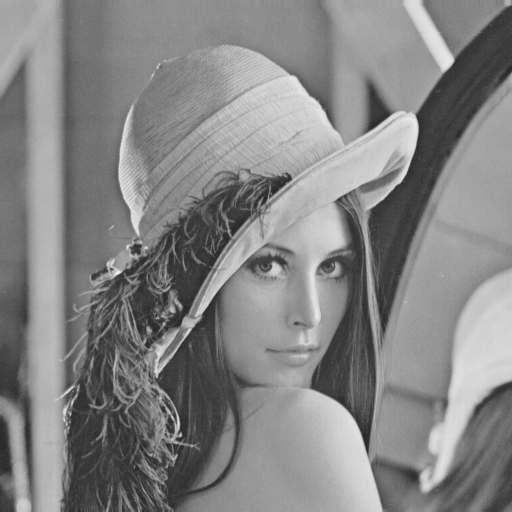

In [74]:
path = '/content/Lenna_(test_image).png'
img = cv2.imread(path, 0)
cv2_imshow(img)

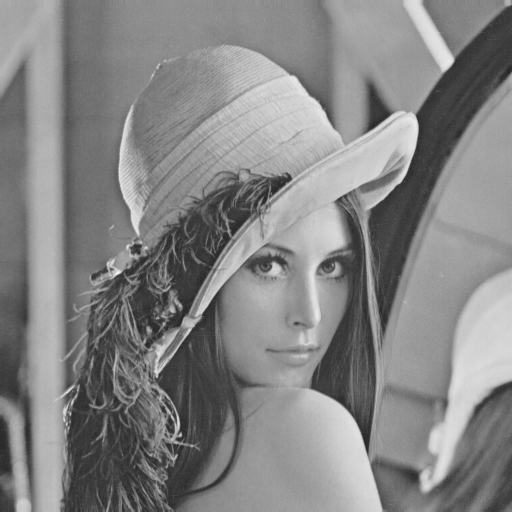

In [75]:
encoded = encode(img, 'Lenna')
cv2_imshow(encoded)

In [76]:
decoded = decode(encoded, 5)
print(decoded)

Lenna
